Luis Adolfo Martínez 
**22000352** 

Objetivo: teniendo un dataset de categorias de flores, se realizo un modelo CNN para predecir que tipo de planta es la de la imagen

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
 
import tensorflow as tf
import random as rn

In [2]:
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


In [3]:
import os.path
from os import path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [6]:
X=[]
Z=[]
IMG_SIZE=150

In [7]:
class funciones:
  def __init__(self,direccion):
       self.direc = direccion
  def data_train(self,categoria):   
      for img in tqdm(os.listdir(self.direc)):
        dire = os.path.join(self.direc,img)
        imagen = cv2.imread(dire,cv2.IMREAD_COLOR)
        imagen = cv2.resize(imagen, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(imagen))
        Z.append(str(categoria))
  def graficar(self,arrayx,arrayz,label):
    fig,ax=plt.subplots(5,2)
    fig.set_size_inches(15,15)
    for i in range(5):
      for j in range (2):
          l=rn.randint(0,len(arrayz))
          ax[i,j].imshow(arrayx[l])
          ax[i,j].set_title(label+arrayz[l])
        
    plt.tight_layout()
  def etiquetado(self,x,z):
    et = LabelEncoder()
    Y = et.fit_transform(z)
    Y = to_categorical(Y,5)
    X = np.array(x)
    X= X/255
    return X,Y


In [8]:
MARGARITAS='flower_photosv2/daisy'
GIRASOL='flower_photosv2/sunflowers'
TULIPAN='flower_photosv2/tulips'
DANDELION ='flower_photosv2/dandelion'
ROSAS='flower_photosv2/roses'

In [9]:
funcion = funciones(MARGARITAS)
funcion.data_train('Margaritas')
funcion = funciones(GIRASOL)
funcion.data_train('Girasol')
funcion = funciones(TULIPAN)
funcion.data_train('Tulipan')
funcion = funciones(DANDELION)
funcion.data_train('Dandelion')
funcion = funciones(ROSAS)
funcion.data_train('Rosas')

100%|██████████| 312/312 [00:06<00:00, 47.15it/s] 


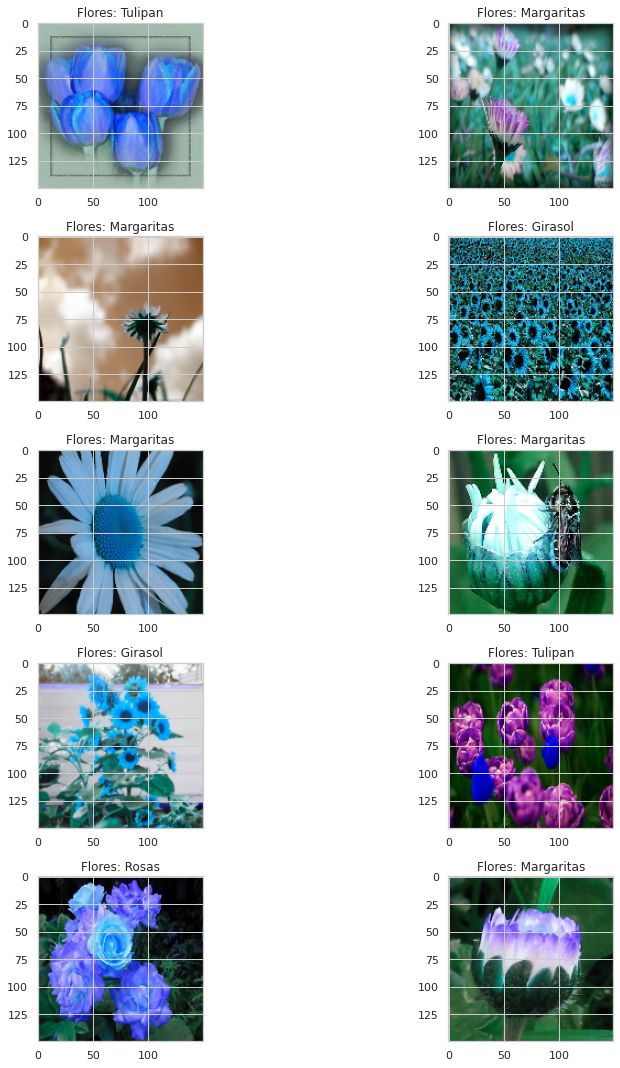

In [10]:
funcion = funciones(GIRASOL)
funcion.graficar(X,Z,'Flores: ')

In [11]:
funcion = funciones(GIRASOL)

In [12]:
xencode,yencode = funcion.etiquetado(X,Z)

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(xencode,yencode,test_size=0.25,random_state=42)

In [14]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [15]:
modelo = Sequential()
modelo.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
modelo.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

modelo.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(512))
modelo.add(Activation('relu'))  
modelo.add(Dense(5, activation = "softmax"))

In [16]:
batch_size=128
epochs=50
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
lr = 0.001
loss ='categorical_crossentropy'
# Parametros para prevenir el sobre ajuste
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        horizontal_flip=True,  
        vertical_flip=False)  

In [17]:
datagen.fit(xtrain)

In [18]:
modelo.compile(optimizer=Adam(lr=lr),loss=loss,metrics=['accuracy'])

In [19]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [20]:
#Generamos el modelo
History = modelo.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xtest,ytest),
                              verbose = 1, steps_per_epoch=xtrain.shape[0] // batch_size)


Epoch 1/50
9/9 [==============================] - 68s 7s/step - loss: 1.6751 - accuracy: 0.2273 - val_loss: 1.5886 - val_accuracy: 0.3792
Epoch 2/50
9/9 [==============================] - 69s 8s/step - loss: 1.5330 - accuracy: 0.3012 - val_loss: 1.3228 - val_accuracy: 0.4444
Epoch 3/50
9/9 [==============================] - 66s 7s/step - loss: 1.2873 - accuracy: 0.4429 - val_loss: 1.1910 - val_accuracy: 0.5362
Epoch 4/50
9/9 [==============================] - 65s 7s/step - loss: 1.1924 - accuracy: 0.5139 - val_loss: 1.2471 - val_accuracy: 0.4976
Epoch 5/50
9/9 [==============================] - 78s 9s/step - loss: 1.1505 - accuracy: 0.5112 - val_loss: 1.1339 - val_accuracy: 0.5435
Epoch 6/50
9/9 [==============================] - 73s 8s/step - loss: 1.0940 - accuracy: 0.5490 - val_loss: 1.0939 - val_accuracy: 0.5942
Epoch 7/50
9/9 [==============================] - 85s 10s/step - loss: 1.0409 - accuracy: 0.5939 - val_loss: 1.1529 - val_accuracy: 0.5386
Epoch 8/50
9/9 [=================

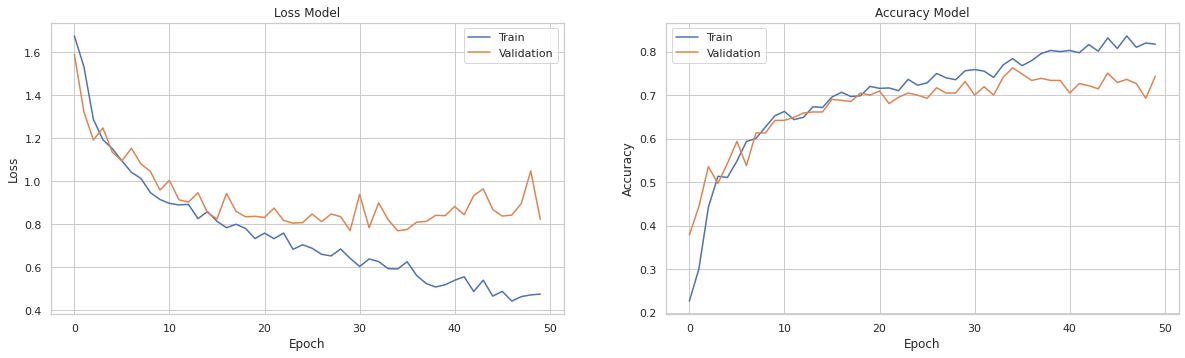

In [27]:
plt.figure(figsize=(18, 5))

# Loss Graph
plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Train')
plt.plot(History.history['val_loss'], label='Validation')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Train')
plt.plot(History.history['val_accuracy'], label='Validation')
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [28]:
#Realizamos la predicción con nuestro modelo ya entrenado
y_pred=modelo.predict(xtest)
pred_digits=np.argmax(y_pred,axis=1)

In [36]:
round(History.history['accuracy'][-1],2)*100

82.0

Mostramos algunos predicciones

In [30]:
i=0
corrPredct=[]


for i in range(len(ytest)):
    if(np.argmax(ytest[i])==pred_digits[i]):
        corrPredct.append(i)
    if(len(corrPredct)==12):
        break


In [31]:
lenc=LabelEncoder()
Y=lenc.fit_transform(Z)

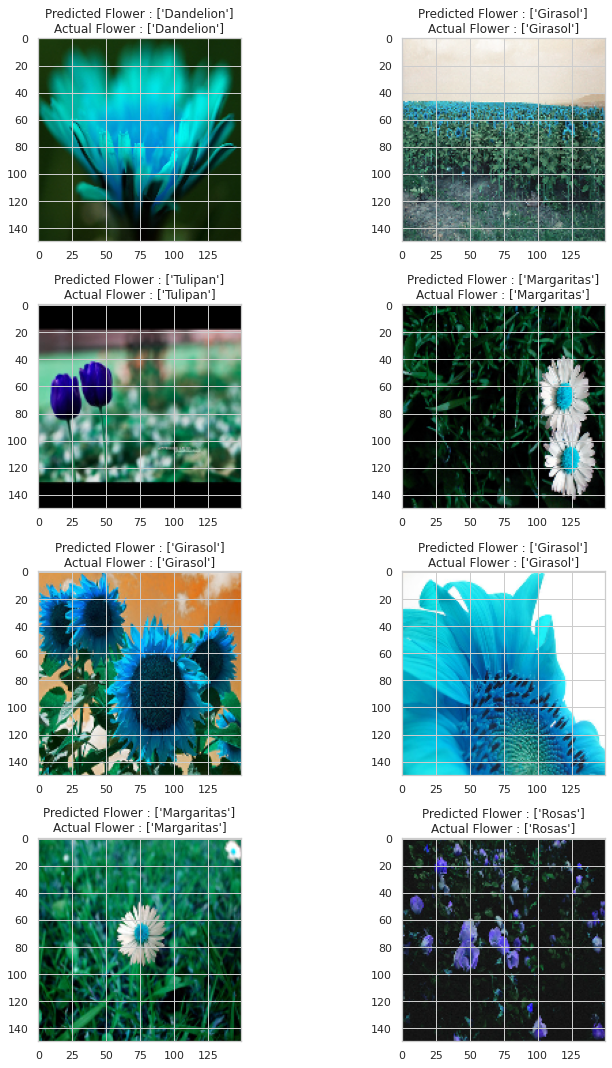

In [32]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(xtest[corrPredct[count]])
        #ax[i,j].set_title("Predicted Flower: "+str(le.inverse_transform([pred_digits[corrPredct[count]]])))
        #ax[i,j].set_title("Actual:"+ str(le.inverse_transform(np.argmax([y_test[corrPredct[count]]],axis=1))))
        #ax[i,j].set_title("Actual Flower: "+str(le.inverse_transform(np.argmax([y_test[corrPredct[count]]]))))
        ax[i,j].set_title("Predicted Flower : "+str(lenc.inverse_transform([pred_digits[corrPredct[count]]]))+"\n"+"Actual Flower : "+str(lenc.inverse_transform(np.argmax([ytest[corrPredct[count]]],axis=1))))
        plt.tight_layout()
        count+=1

**Conclusión**

Con las librerias existentes se nos facilita mucho el trabajo para el procesamiento de imagenes, pero durante el procesos de desarrollo de este modelo se necesita mucho tiempo computacional.

El modelo fue entranado con 50 epoch y se obtuvo una preción del 82% con lo que podemos considerar que tenemos un buen modelo para la clsificacion de plantas.

Para el entrenamiento de este modelo se necsito mucho tiempo computacional.